In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv("train.csv", parse_dates=['DisbursalDate', 'Date.of.Birth'])
test = pd.read_csv("test.csv", parse_dates=['DisbursalDate', 'Date.of.Birth'])

submission = pd.read_csv("sample_submission.csv")

In [3]:
train.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [4]:
train.dtypes

UniqueID                                        int64
disbursed_amount                                int64
asset_cost                                      int64
ltv                                           float64
branch_id                                       int64
supplier_id                                     int64
manufacturer_id                                 int64
Current_pincode_ID                              int64
Date.of.Birth                          datetime64[ns]
Employment.Type                                object
DisbursalDate                          datetime64[ns]
State_ID                                        int64
Employee_code_ID                                int64
MobileNo_Avl_Flag                               int64
Aadhar_flag                                     int64
PAN_flag                                        int64
VoterID_flag                                    int64
Driving_flag                                    int64
Passport_flag               

In [5]:
import datetime

train['Date.of.Birth'] = pd.to_datetime(train['Date.of.Birth'])
train['DisbursalDate'] = pd.to_datetime(train['DisbursalDate'])

now = datetime.datetime.now()
train['Age'] = ((now - train['Date.of.Birth'])/365).dt.days



In [6]:
delta = (now - train['DisbursalDate'])
train['Days_Since_Disbursal'] = delta.dt.days

In [7]:
train['CREDIT.HISTORY.LENGTH_yr'] = train['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0])
train['CREDIT.HISTORY.LENGTH_yr'] = train['CREDIT.HISTORY.LENGTH_yr'].apply(lambda x: x.split('yrs')[0])

train['CREDIT.HISTORY.LENGTH_mon'] = train['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[1])
train['CREDIT.HISTORY.LENGTH_mon'] = train['CREDIT.HISTORY.LENGTH_mon'].apply(lambda x: x.split('mon')[0])

train['CREDIT.HISTORY.LENGTH_total_months'] = (train['CREDIT.HISTORY.LENGTH_yr'].astype(int))*12 + train['CREDIT.HISTORY.LENGTH_mon'].astype(int)
train = train.drop(['CREDIT.HISTORY.LENGTH_yr', 'CREDIT.HISTORY.LENGTH_mon'], axis = 1)



In [8]:

train['AVERAGE.ACCT.AGE_yr'] = train['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0])
train['AVERAGE.ACCT.AGE_yr'] = train['AVERAGE.ACCT.AGE_yr'].apply(lambda x: x.split('yrs')[0])

train['AVERAGE.ACCT.AGE_mon'] = train['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[1])
train['AVERAGE.ACCT.AGE_mon'] = train['AVERAGE.ACCT.AGE_mon'].apply(lambda x: x.split('mon')[0])

train['AVERAGE.ACCT.AGE_total_months'] = (train['AVERAGE.ACCT.AGE_yr'].astype(int))*12 + train['AVERAGE.ACCT.AGE_mon'].astype(int)

train = train.drop(['AVERAGE.ACCT.AGE_yr', 'AVERAGE.ACCT.AGE_mon'], axis = 1)


In [9]:
## Label Encoding for PERFORM_CNS.SCORE.DESCRIPTION

train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 1)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 2)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 2)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 5)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 5)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 5)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 5)

# checing the values in bureau score
train['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()




0    129785
5     50728
4     18294
3     12412
2     12025
1      9910
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [10]:
train['branch_id'] = train['branch_id'].astype('category')
train['manufacturer_id'] = train['manufacturer_id'].astype('category')
train['State_ID'] = train['State_ID'].astype('category')

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['branch_id'] = le.fit_transform(train['branch_id'])
train['manufacturer_id'] = le.fit_transform(train['manufacturer_id'])
train['State_ID'] = le.fit_transform(train['State_ID'])


In [11]:
train['PRI.CURRENT.BALANCE'].fillna(train['PRI.CURRENT.BALANCE'].mean(), inplace = True)
train['PRI.SANCTIONED.AMOUNT'].fillna(train['PRI.SANCTIONED.AMOUNT'].mean(), inplace = True)
train['SEC.CURRENT.BALANCE'].fillna(train['SEC.CURRENT.BALANCE'].mean(), inplace = True)

In [12]:
train['PERFORM_CNS.SCORE'] = np.log1p(train['PERFORM_CNS.SCORE'])
train['disbursed_amount'] = np.log1p(train['disbursed_amount'])
train['asset_cost'] = np.log1p(train['asset_cost'])
train['ltv'] = np.log1p(train['ltv'])
train['PRIMARY.INSTAL.AMT'] = np.log1p(train['PRIMARY.INSTAL.AMT'])
train['SEC.INSTAL.AMT'] = np.log1p(train['SEC.INSTAL.AMT'])
train['SEC.NO.OF.ACCTS'] = np.log1p(train['SEC.NO.OF.ACCTS'])
train['SEC.ACTIVE.ACCTS'] = np.log1p(train['SEC.ACTIVE.ACCTS'])
train['SEC.OVERDUE.ACCTS'] = np.log1p(train['SEC.OVERDUE.ACCTS'])
train['SEC.SANCTIONED.AMOUNT'] = np.log1p(train['SEC.SANCTIONED.AMOUNT'])
train['SEC.DISBURSED.AMOUNT'] = np.log1p(train['SEC.DISBURSED.AMOUNT'])
#train['SEC.CURRENT.BALANCE'] = np.log1p(train['SEC.CURRENT.BALANCE'])
train['PRI.NO.OF.ACCTS'] = np.log1p(train['PRI.NO.OF.ACCTS'])
train['PRI.ACTIVE.ACCTS'] = np.log1p(train['PRI.ACTIVE.ACCTS'])
train['PRI.OVERDUE.ACCTS'] = np.log1p(train['PRI.OVERDUE.ACCTS'])
#train['PRI.CURRENT.BALANCE'] = np.log1p(train['PRI.CURRENT.BALANCE'])
#train['PRI.SANCTIONED.AMOUNT'] = np.log1p(train['PRI.SANCTIONED.AMOUNT'])
train['PRI.DISBURSED.AMOUNT'] = np.log1p(train['PRI.DISBURSED.AMOUNT'])



9839 112392


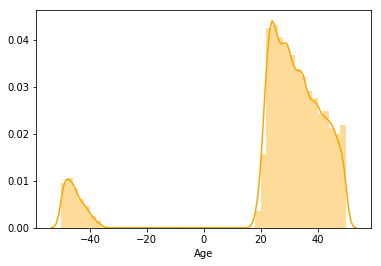

In [13]:
##Date.of.Birth - derive Age from this and drop this 

test['Date.of.Birth'] = pd.to_datetime(test['Date.of.Birth'])

now = datetime.datetime.now()
test['Age'] = ((now - test['Date.of.Birth'])/365).dt.days

sns.distplot(test['Age'],  color = 'orange')

print(len(test[test['Age'] <= 0]), len(test))

0    401
1    147
2    138
Name: Days_Since_Disbursal, dtype: int64


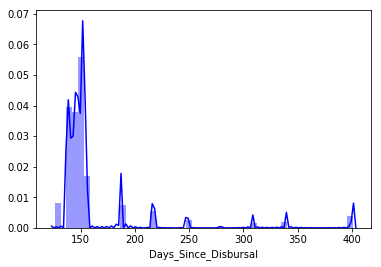

In [14]:
##DisbursalDate - derive days elapsed since loan disbursal

test['DisbursalDate'] = pd.to_datetime(test['DisbursalDate'])
delta = (now - test['DisbursalDate'])
test['Days_Since_Disbursal'] = delta.dt.days

print(test['Days_Since_Disbursal'][:3])

sns.distplot(test['Days_Since_Disbursal'], color='blue')


In [15]:
##PERFORM_CNS.SCORE.DESCRIPTION - label encode categorical data

test['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

## Label Encoding for PERFORM_CNS.SCORE.DESCRIPTION

test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 1)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 2)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 2)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 5)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 5)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 5)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 5)

# checing the values in bureau score
test['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()




0    63017
5    24993
4     8070
3     5990
2     5642
1     4680
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [16]:
##AVERAGE.ACCT.AGE - extract the #yrs and #months as total # months

test['AVERAGE.ACCT.AGE_yr'] = test['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0])
test['AVERAGE.ACCT.AGE_yr'] = test['AVERAGE.ACCT.AGE_yr'].apply(lambda x: x.split('yrs')[0])

test['AVERAGE.ACCT.AGE_mon'] = test['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[1])
test['AVERAGE.ACCT.AGE_mon'] = test['AVERAGE.ACCT.AGE_mon'].apply(lambda x: x.split('mon')[0])

test['AVERAGE.ACCT.AGE_total_months'] = (test['AVERAGE.ACCT.AGE_yr'].astype(int))*12 + test['AVERAGE.ACCT.AGE_mon'].astype(int)

test = test.drop(['AVERAGE.ACCT.AGE_yr', 'AVERAGE.ACCT.AGE_mon'], axis = 1)



In [17]:
##CREDIT.HISTORY.LENGTH  - extract the #yrs and #months as total # months

test['CREDIT.HISTORY.LENGTH_yr'] = test['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0])
test['CREDIT.HISTORY.LENGTH_yr'] = test['CREDIT.HISTORY.LENGTH_yr'].apply(lambda x: x.split('yrs')[0])

test['CREDIT.HISTORY.LENGTH_mon'] = test['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[1])
test['CREDIT.HISTORY.LENGTH_mon'] = test['CREDIT.HISTORY.LENGTH_mon'].apply(lambda x: x.split('mon')[0])

test['CREDIT.HISTORY.LENGTH_total_months'] = (test['CREDIT.HISTORY.LENGTH_yr'].astype(int))*12 + test['CREDIT.HISTORY.LENGTH_mon'].astype(int)
test = test.drop(['CREDIT.HISTORY.LENGTH_yr', 'CREDIT.HISTORY.LENGTH_mon'], axis = 1)



In [18]:
##branch_id  - convert to category and label encode
test['branch_id'] = test['branch_id'].astype('category')
le = LabelEncoder()
test['branch_id'] = le.fit_transform(test['branch_id'])

##manufacturer_id  - convert to category and label encode
test['manufacturer_id'] = test['manufacturer_id'].astype('category')
test['manufacturer_id'] = le.fit_transform(test['manufacturer_id'])

##State_ID - convert to category and label encode
test['State_ID'] = test['State_ID'].astype('category')
test['State_ID'] = le.fit_transform(test['State_ID'])


In [19]:

test['PRI.CURRENT.BALANCE'].fillna(test['PRI.CURRENT.BALANCE'].mean(), inplace = True)
test['PRI.SANCTIONED.AMOUNT'].fillna(test['PRI.SANCTIONED.AMOUNT'].mean(), inplace = True)
test['SEC.CURRENT.BALANCE'].fillna(test['SEC.CURRENT.BALANCE'].mean(), inplace = True)


In [20]:
## Log transform:
'''
PERFORM_CNS.SCORE
disbursed_amount
asset_cost
ltv
PRIMARY.INSTAL.AMT
SEC.INSTAL.AMT
SEC.NO.OF.ACCTS
SEC.ACTIVE.ACCTS
SEC.OVERDUE.ACCTS
SEC.SANCTIONED.AMOUNT
SEC.DISBURSED.AMOUNT
SEC.CURRENT.BALANCE
PRI.NO.OF.ACCTS
PRI.ACTIVE.ACCTS
PRI.OVERDUE.ACCTS
PRI.CURRENT.BALANCE
PRI.SANCTIONED.AMOUNT
PRI.DISBURSED.AMOUNT
'''

test['PERFORM_CNS.SCORE'] = np.log1p(test['PERFORM_CNS.SCORE'])
test['disbursed_amount'] = np.log1p(test['disbursed_amount'])
test['asset_cost'] = np.log1p(test['asset_cost'])
test['ltv'] = np.log1p(test['ltv'])
test['PRIMARY.INSTAL.AMT'] = np.log1p(test['PRIMARY.INSTAL.AMT'])
test['SEC.INSTAL.AMT'] = np.log1p(test['SEC.INSTAL.AMT'])
test['SEC.NO.OF.ACCTS'] = np.log1p(test['SEC.NO.OF.ACCTS'])
test['SEC.ACTIVE.ACCTS'] = np.log1p(test['SEC.ACTIVE.ACCTS'])
test['SEC.OVERDUE.ACCTS'] = np.log1p(test['SEC.OVERDUE.ACCTS'])
test['SEC.SANCTIONED.AMOUNT'] = np.log1p(test['SEC.SANCTIONED.AMOUNT'])
test['SEC.DISBURSED.AMOUNT'] = np.log1p(test['SEC.DISBURSED.AMOUNT'])
#test['SEC.CURRENT.BALANCE'] = np.log1p(test['SEC.CURRENT.BALANCE'])
test['PRI.NO.OF.ACCTS'] = np.log1p(test['PRI.NO.OF.ACCTS'])
test['PRI.ACTIVE.ACCTS'] = np.log1p(test['PRI.ACTIVE.ACCTS'])
test['PRI.OVERDUE.ACCTS'] = np.log1p(test['PRI.OVERDUE.ACCTS'])
#test['PRI.CURRENT.BALANCE'] = np.log1p(test['PRI.CURRENT.BALANCE'])
#test['PRI.SANCTIONED.AMOUNT'] = np.log1p(test['PRI.SANCTIONED.AMOUNT'])
test['PRI.DISBURSED.AMOUNT'] = np.log1p(test['PRI.DISBURSED.AMOUNT'])




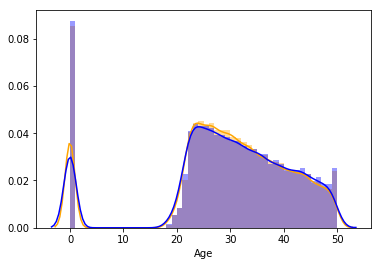

In [21]:
train.loc[train['Age'] <= 0, 'Age'] = 0
test.loc[test['Age'] <= 0, 'Age'] = 0

sns.distplot(train['Age'], color='orange')
sns.distplot(test['Age'], color='blue')

In [22]:
### Impute Employment.Type
train['Employment.Type'] = train['Employment.Type'].replace(('Self employed', 'Salaried'), (0, 1))

emp = train.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID', 'Employee_code_ID', 'Date.of.Birth', 'DisbursalDate', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'Age'], axis=1)


In [56]:
## split into train and test sets
train_emp = emp[emp['Employment.Type'].notnull()]
y_train_emp = train_emp['Employment.Type'].astype(int)

train_emp_ld = train_emp['loan_default'].astype(int)
train_emp = train_emp.drop(['Employment.Type', 'loan_default'], axis=1)

test_emp = emp[emp['Employment.Type'].isnull()]
test_emp_ld = test_emp['loan_default'].astype(int)
test_emp = test_emp.drop(['Employment.Type', 'loan_default'], axis=1)



In [57]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_emp = sc.fit_transform(train_emp)
test_emp = sc.transform(test_emp)

train_emp = pd.DataFrame(train_emp)
test_emp = pd.DataFrame(test_emp)

train_emp['loan_default'] = train_emp_ld.values
test_emp['loan_default'] = test_emp_ld.values



In [59]:
from lightgbm import LGBMClassifier

model_emp = LGBMClassifier()

model_emp.fit(train_emp, y_train_emp)

y_test_emp_pred = model_emp.predict(test_emp)


In [61]:

train_emp['Employment.Type'] = y_train_emp.values
test_emp['Employment.Type'] = y_test_emp_pred

train_emp_imputed = pd.concat([train_emp, test_emp], axis=0)



In [64]:
## Model based Imputation for the Employment.Type column for the test data set
test['Employment.Type'] = test['Employment.Type'].replace(('Self employed', 'Salaried'), (0, 1))

emp = test.drop(['supplier_id', 'Current_pincode_ID', 'Employee_code_ID', 'Date.of.Birth', 'DisbursalDate', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'Age'], axis=1)

## split into train and test sets
test_train_emp = emp[emp['Employment.Type'].notnull()]
test_y_train_emp = test_train_emp['Employment.Type']
test_uniqueid_1 = test_train_emp['UniqueID']
test_train_emp = test_train_emp.drop(['Employment.Type', 'UniqueID'], axis=1)

test_test_emp = emp[emp['Employment.Type'].isnull()]
test_uniqueid_2 = test_test_emp['UniqueID']
test_test_emp = test_test_emp.drop(['Employment.Type', 'UniqueID'], axis=1)


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
test_train_emp = sc.fit_transform(test_train_emp)
test_test_emp = sc.transform(test_test_emp)

test_train_emp = pd.DataFrame(test_train_emp)
test_test_emp = pd.DataFrame(test_test_emp)


from lightgbm import LGBMClassifier

test_model_emp = LGBMClassifier()

test_model_emp.fit(test_train_emp, test_y_train_emp)

test_y_test_emp_pred = test_model_emp.predict(test_test_emp)

test_train_emp = pd.DataFrame(test_train_emp)
test_test_emp = pd.DataFrame(test_test_emp)
test_train_emp['Employment.Type'] = test_y_train_emp.values
test_test_emp['Employment.Type'] = test_y_test_emp_pred

test_emp_imputed = pd.concat([test_train_emp, test_test_emp], axis=0)


In [76]:
## remove attributes : UniqueID, supplier_id, Current_pincode_ID, Employee_code_ID, Date.of.Birth, DisbursalDate

y_train = train_emp_imputed['loan_default']
train_emp_imputed = train_emp_imputed.drop(['loan_default'], axis=1)
unique_id = test_uniqueid_1
unique_id = unique_id.append(test_uniqueid_2, ignore_index=True)

#train = train.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID', 'Employee_code_ID', 'Date.of.Birth', 'DisbursalDate', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'Age', 'loan_default'], axis = 1)

#test = test.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID', 'Employee_code_ID', 'Date.of.Birth', 'DisbursalDate', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'Age'], axis = 1)




In [77]:
## Class Imbalance

y_train.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [87]:


sc = StandardScaler()

train_emp_imputed[['Employment.Type']] = sc.fit_transform(train_emp_imputed[['Employment.Type']])
test_emp_imputed[['Employment.Type']] = sc.transform(test_emp_imputed[['Employment.Type']])



In [90]:
## Oversampling the minority class (1) SMOTE

from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_sample(train_emp_imputed, y_train.values.ravel()) 

# checking the shape of x_resample and y_resample
print("Shape of x:", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x: (365086, 35)
Shape of y: (365086,)


In [91]:
## Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_resample,y_resample)

print("Training Accuracy: ", gnb.score(x_resample, y_resample))


Training Accuracy:  0.5632042861134089


In [92]:
## Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(x_resample, y_resample)

print("Training Accuracy: ", model_rf.score(x_resample, y_resample))


Training Accuracy:  0.9915828051472804


In [93]:
## LightGBM Classifier

from lightgbm import LGBMClassifier

model_lgb = LGBMClassifier()
model_lgb.fit(x_resample, y_resample)

print("Training Accuracy: ", model_lgb.score(x_resample, y_resample))


Training Accuracy:  0.8324887834647179


In [94]:
## predictions

y_pred_gnb = gnb.predict(test_emp_imputed)
y_pred_rf = model_rf.predict(test_emp_imputed)
y_pred_lgb = model_lgb.predict(test_emp_imputed)


In [95]:
predictions = y_pred_gnb*0.4 + y_pred_lgb*0.3 + y_pred_rf*0.3


In [96]:
submission = pd.DataFrame({'UniqueID': unique_id,'loan_default': predictions})

submission.to_csv('submission.csv',index=False)
